In [1]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Age, Department)
#Standardization of each value(Gender)
#Concatenate First Name and Last Name
#Add a new column(YearsAtCompany)
#STrength by Maritial Status

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
pd.reset_option("display.max_rows",None)
df = pd.read_csv("Sample_HR.csv")


# df =  df[df.duplicated()].shape[0]
df = df.drop_duplicates()

# df = df[df['Age'].isnull()]

Average_age = int(df['Age'].mean())
df["Age"] = df["Age"].fillna(Average_age)

# df = df[df["Age"].isnull()]
df["Department"] =  df["Department"].fillna('Data Engineering')

# df = df[df["Department"] == "Data Engineering"]
# df.query("Department == 'TECH'")

df["Gender"] = df["Gender"].replace({"M":"Male","F":"Female"})
df["Full Name"] =  df["First Name"] + " " +df["Last Name"]

columns = df.columns.tolist()
last_name_index  = columns.index("Last Name")
columns.insert(last_name_index + 1,columns.pop(columns.index("Full Name")))
df = df[columns]
df = df.drop("YearsAtCompany",axis = 1)

# Get the no of experience
hire_date = pd.to_datetime(df["Hire_Date"]).dt.year
current_date = datetime.now().year
df["YearsAtCompany"] =  current_date - hire_date

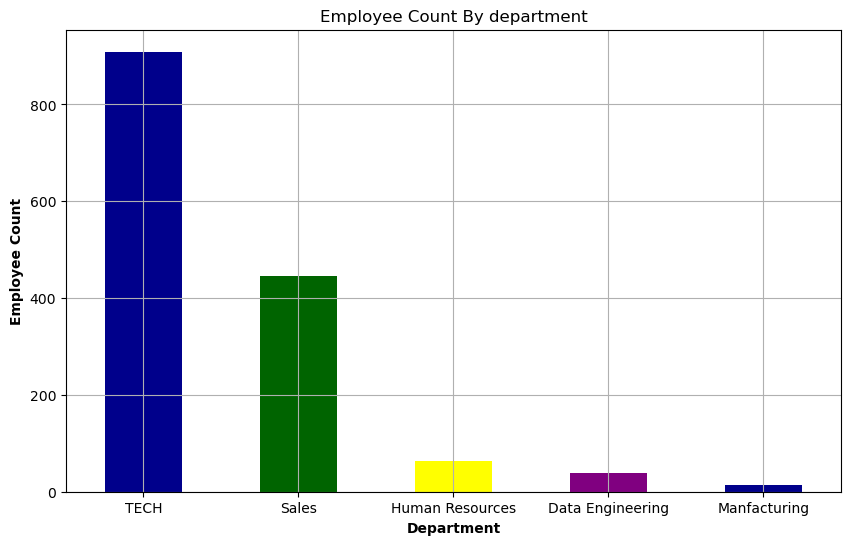

In [4]:
# Visualization

department_count = df["Department"].value_counts()
plt.figure(figsize = (10,6))
color = ['darkblue','darkgreen','yellow','purple' ]
department_count.plot(kind = 'bar', color = color)
plt.title("Employee Count By department")
plt.xlabel("Department", fontweight =  'bold')
plt.ylabel("Employee Count", fontweight =  'bold')
plt.xticks(rotation = 0)
plt.grid()
plt.show()

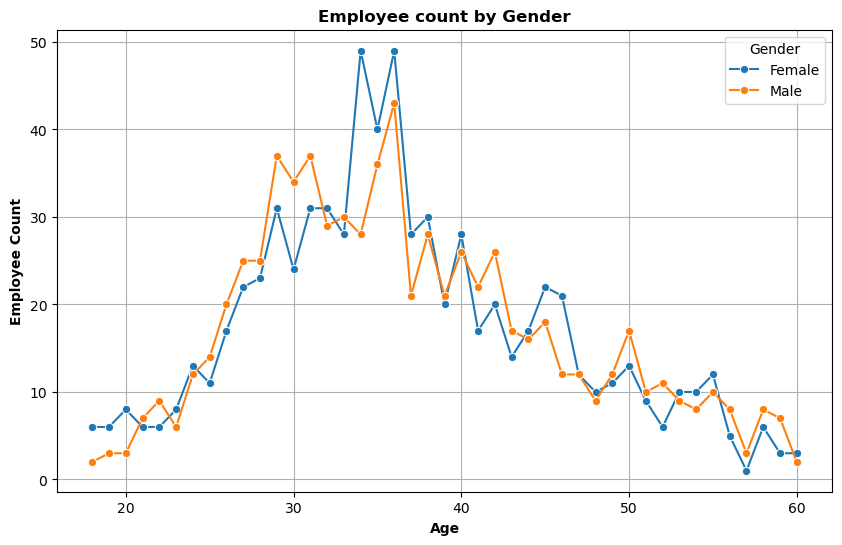

In [52]:
# Linechart
age_gender  = df.groupby(["Age","Gender"]).size().reset_index(name  = 'Count')
plt.figure(figsize=(10,6))
sns.lineplot(data = age_gender, x = "Age", y = 'Count', hue= 'Gender', marker = 'o')
plt.title("Employee count by Gender", fontweight = 'bold')
plt.xlabel("Age", fontweight = 'bold')
plt.ylabel("Employee Count", fontweight = 'bold')
plt.xticks(rotation = 0)
plt.grid(True)
plt.show()

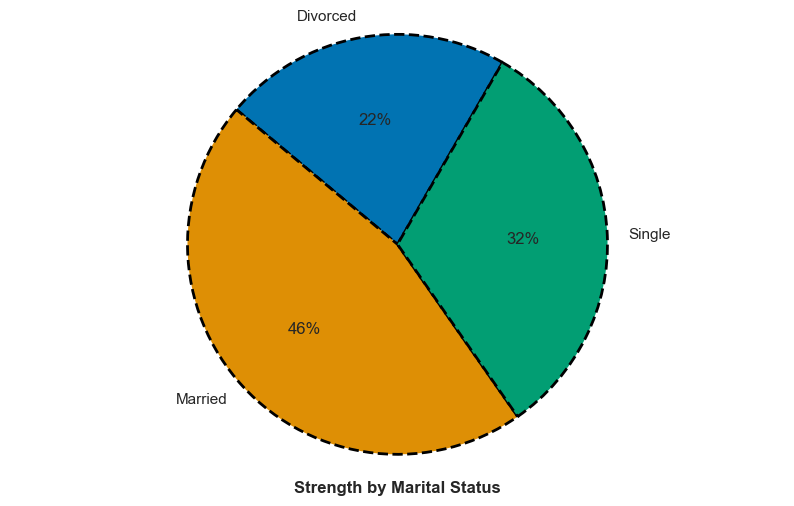

In [101]:
# Pie plot

Marital_status_count = df.groupby(['MaritalStatus']).size().reset_index(name = 'count')
Marital_Status  = Marital_status_count['MaritalStatus']
Count =  Marital_status_count['count']

sns.set(style="whitegrid")
colors = sns.color_palette("colorblind")[0:len(Marital_Status)]
# colors = ['darkblue','darkgreen','yellow']
plt.figure(figsize=(10,6))
# colors= ['Red','Blue','Orange']
plt.pie(Count, 
        labels =Marital_Status,
        colors = colors,
        autopct = '%1.0f%%',
        startangle  =60,
       wedgeprops = {'edgecolor': 'black','linewidth':2,'linestyle':'--'}
       )
plt.axis('equal')
plt.xlabel('Strength by Marital Status', fontweight = 'bold')
plt.show()

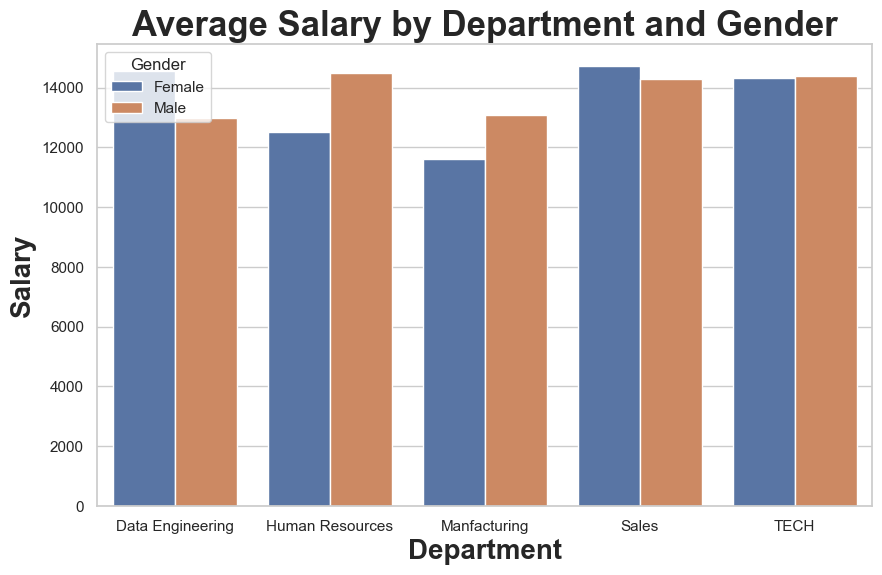

In [151]:
avg_salary =  df.groupby(['Department','Gender'])['Salary'].mean().reset_index()
                            
plt.figure(figsize = (10,6))
sns.barplot(data =  avg_salary, 
            x = 'Department', 
            y = 'Salary', 
            hue = 'Gender' )

plt.title("Average Salary by Department and Gender", fontweight = 'bold', fontsize = 25)
plt.xlabel("Department", fontweight = 'bold', fontsize  =  20)
plt.ylabel("Salary",fontweight = 'bold',fontsize = 20)
plt.legend(title = 'Gender', loc = 'upper left')
plt.show()

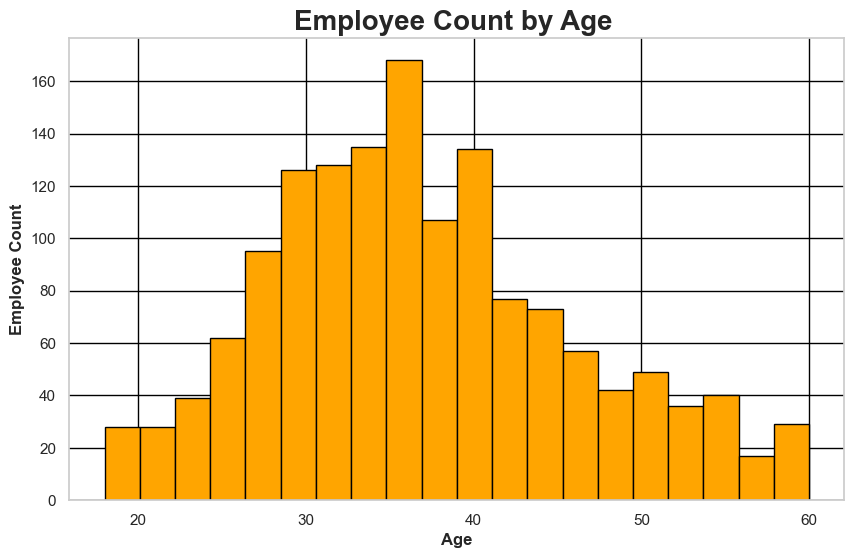

In [172]:
# Histrograms
age = df['Age'].reset_index()
bins = [10,20,30,40,50,60,70]
plt.figure(figsize = (10,6))
plt.hist(age['Age'],bins =20, color = 'orange', edgecolor = 'black')
plt.title("Employee Count by Age ", fontweight = 'bold', fontsize  =  20)
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Employee Count', fontweight = 'bold')
plt.grid(True, color =  'black')
plt.show()

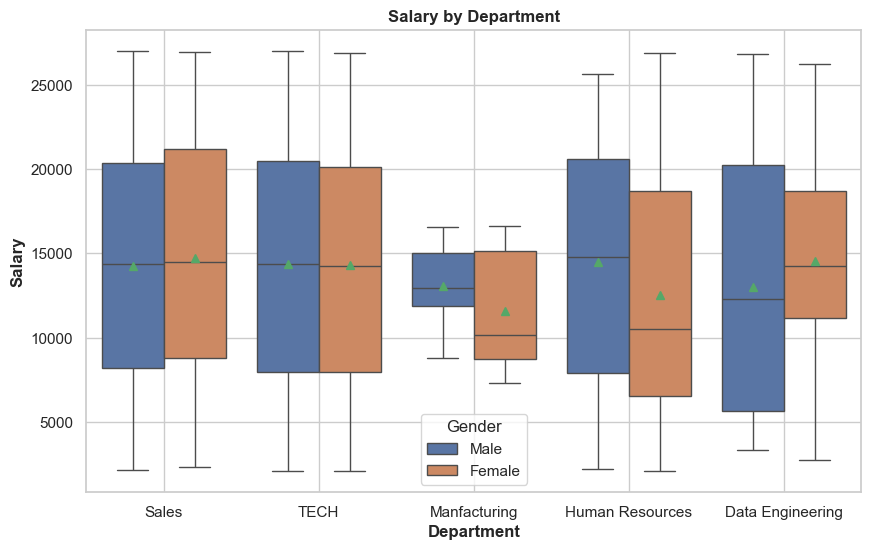

In [180]:
# Box plot

plt.figure(figsize = (10,6))
sns.boxplot(x = 'Department', y= 'Salary', data = df, hue = 'Gender', showmeans = True, 
            meanprops ={'marker':'o','markerfacecolor':'white','market'
                                                                                                   })
plt.title('Salary by Department', fontweight = 'bold')
plt.xlabel('Department', fontweight = 'bold')
plt.ylabel('Salary', fontweight = 'bold')
plt.grid(True)
plt.show()